<a href="https://colab.research.google.com/github/vinaybist/SecurityRequirement/blob/main/SecurityRequirement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Categorization, Prioritization, and Summarization of Security Vulnerabilities or Weaknesses**

A system leveraging SecureBERT to analyze security vulnerabilities by:

- Categorizing the type of vulnerability
- Assigning priority levels
- Providing structured analysis of security weaknesses

In [37]:
!pip install datasets

In [2]:
import pandas as pd
import random

# Create sample security findings
security_data = {
    'ID': [],
    'Description': [],
    'Priority': [],
    'Category': []
}

# Sample descriptions
descriptions = [
    "SQL injection vulnerability found in login form allowing unauthorized database access",
    "Weak password policy allows brute force attacks",
    "Cross-site scripting (XSS) vulnerability in comment section",
    "Sensitive data exposure through unencrypted transmission",
    "Missing access controls in admin panel",
    "Buffer overflow vulnerability in input validation",
    "Outdated SSL certificate with known vulnerabilities",
    "Insecure direct object references in API endpoints",
    "Command injection vulnerability in file upload feature",
    "Authentication bypass in password reset functionality"
]

# Possible values
priorities = ['HIGH', 'MEDIUM', 'LOW']
categories = ['Injection', 'Authentication', 'Data Exposure', 'Access Control', 'Input Validation']

# Generate 100 sample entries
for i in range(100):
    security_data['ID'].append(f'SEC-{str(i+1).zfill(3)}')
    security_data['Description'].append(random.choice(descriptions))
    security_data['Priority'].append(random.choice(priorities))
    security_data['Category'].append(random.choice(categories))

# Create DataFrame
df = pd.DataFrame(security_data)

# Save to CSV
df.to_csv('security_findings.csv', index=False)

# Display first few rows
print("Sample of the dataset:")
print(df.head())

# Display distribution of priorities and categories
print("\nDistribution of Priorities:")
print(df['Priority'].value_counts())
print("\nDistribution of Categories:")
print(df['Category'].value_counts())

Sample of the dataset:
        ID                                        Description Priority  \
0  SEC-001  Sensitive data exposure through unencrypted tr...      LOW   
1  SEC-002  Cross-site scripting (XSS) vulnerability in co...     HIGH   
2  SEC-003             Missing access controls in admin panel     HIGH   
3  SEC-004  Sensitive data exposure through unencrypted tr...      LOW   
4  SEC-005  Insecure direct object references in API endpo...      LOW   

         Category  
0  Authentication  
1  Access Control  
2  Access Control  
3  Authentication  
4  Authentication  

Distribution of Priorities:
Priority
LOW       42
HIGH      37
MEDIUM    21
Name: count, dtype: int64

Distribution of Categories:
Category
Authentication      24
Injection           22
Data Exposure       21
Input Validation    18
Access Control      15
Name: count, dtype: int64


In [3]:
# prompt: data preprocessing to see the insight of it

import pandas as pd

# Load the dataset
df = pd.read_csv('security_findings.csv')

# Display basic statistics
print(df.describe(include='all'))

# Explore data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Analyze the 'Description' column (example)
print("\nDescription Column Analysis:")
print(df['Description'].value_counts())  # Count occurrences of each description
# You can also explore word frequencies or other textual analysis techniques here

# Further analysis based on Priority and Category
print("\nAnalysis by Priority:")
for priority in df['Priority'].unique():
    print(f"  Priority: {priority}")
    print(df[df['Priority'] == priority]['Category'].value_counts())

print("\nAnalysis by Category:")
for category in df['Category'].unique():
    print(f"  Category: {category}")
    print(df[df['Category'] == category]['Priority'].value_counts())

             ID                                        Description Priority  \
count       100                                                100      100   
unique      100                                                 10        3   
top     SEC-001  Cross-site scripting (XSS) vulnerability in co...      LOW   
freq          1                                                 18       42   

              Category  
count              100  
unique               5  
top     Authentication  
freq                24  

Data Types:
ID             object
Description    object
Priority       object
Category       object
dtype: object

Missing Values:
ID             0
Description    0
Priority       0
Category       0
dtype: int64

Description Column Analysis:
Description
Cross-site scripting (XSS) vulnerability in comment section                              18
Outdated SSL certificate with known vulnerabilities                                      14
SQL injection vulnerability found in log

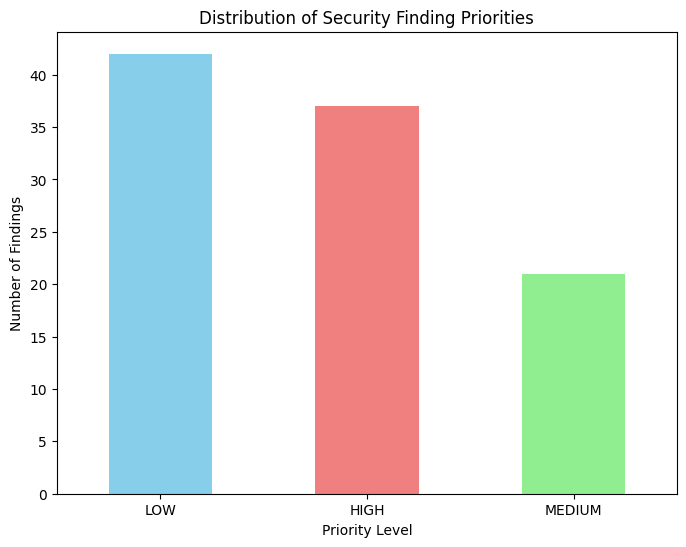

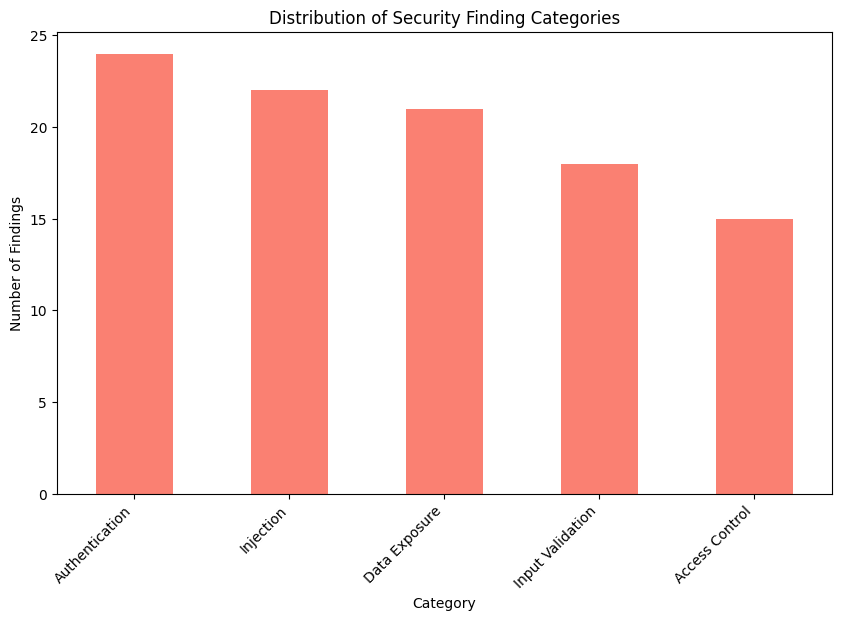

In [4]:
# prompt: using bar chart as well

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already created and saved as 'security_findings.csv')
df = pd.read_csv('security_findings.csv')

# Bar chart for Priority distribution
plt.figure(figsize=(8, 6))
df['Priority'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Security Finding Priorities')
plt.xlabel('Priority Level')
plt.ylabel('Number of Findings')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


# Bar chart for Category distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Security Finding Categories')
plt.xlabel('Category')
plt.ylabel('Number of Findings')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

In [5]:
# get the NLP model from https://github.com/ehsanaghaei/SecureBERT
from transformers import RobertaTokenizer, RobertaModel
import torch

# need that for preprocessing of BERT arch
tokenizer = RobertaTokenizer.from_pretrained("ehsanaghaei/SecureBERT")
#actual model
model = RobertaModel.from_pretrained("ehsanaghaei/SecureBERT")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at ehsanaghaei/SecureBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
model

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dr

In [7]:
#testing
inputs = tokenizer("This is SecureBERT!", return_tensors="pt", padding=True, truncation=True)
print(inputs.keys())
inputs

dict_keys(['input_ids', 'attention_mask'])


{'input_ids': tensor([[    0,   713,    16, 27443, 33362,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [8]:
outputs = model(**inputs)
print(outputs.keys())
#last_hidden_states = outputs.last_hidden_state
outputs

odict_keys(['last_hidden_state', 'pooler_output'])


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0170,  0.0071, -0.0123,  ..., -0.0113, -0.0210,  0.0138],
         [-0.0042, -0.0062,  0.0125,  ...,  0.0109,  0.0025,  0.0005],
         [ 0.0239, -0.0095,  0.0105,  ..., -0.0918,  0.0059,  0.0537],
         ...,
         [ 0.0300, -0.0088, -0.0424,  ..., -0.0552,  0.0206,  0.0271],
         [-0.0323, -0.0561, -0.0065,  ..., -0.0073,  0.0042, -0.0259],
         [-0.0171,  0.0071, -0.0125,  ..., -0.0112, -0.0215,  0.0138]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-2.7570e-02,  3.6894e-04, -1.3198e-02, -5.6688e-02, -3.7237e-02,
         -6.2236e-02,  1.6398e-02,  5.3022e-03, -4.0441e-02, -4.0545e-02,
         -1.3973e-02,  3.5232e-02,  4.5962e-02, -3.4449e-02,  2.0586e-02,
         -2.6051e-02, -1.1352e-02, -2.0004e-02, -1.9662e-02, -4.8768e-04,
          2.7397e-02,  1.1607e-01,  1.2197e-02, -1.3974e-02, -2.2963e-03,
         -1.7604e-02,  3.1118e-02,  8.7916e-04, -1.3762e-02, -3.215

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#Now work on dataset
#load, check
df = pd.read_csv("security_findings.csv")
print("Initial columns:", df.columns.tolist())

# encoders for results
priority_encoder = LabelEncoder()
category_encoder = LabelEncoder()

df['priority_encoded'] = priority_encoder.fit_transform(df['Priority'])
df['category_encoded'] = category_encoder.fit_transform(df['Category'])

# split the data
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Verify split data has encoded columns
print("\nTraining data columns:", train_df.columns.tolist())

In [10]:
train_df.head()

,ID,Description,Priority,Category,priority_encoded,category_encoded
55,SEC-056,Authentication bypass in password reset functi...,LOW,Input Validation,1,4
88,SEC-089,Cross-site scripting (XSS) vulnerability in co...,LOW,Access Control,1,0
26,SEC-027,Outdated SSL certificate with known vulnerabil...,HIGH,Authentication,0,1
42,SEC-043,Insecure direct object references in API endpo...,HIGH,Authentication,0,1
69,SEC-070,SQL injection vulnerability found in login for...,LOW,Access Control,1,0


In [11]:
# Now BERTs preprocess of tokenizing
# Tokenize training data
train_encodings = tokenizer(
    train_df['Description'].tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Tokenize evaluation data
eval_encodings = tokenizer(
    eval_df['Description'].tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

train_encodings.keys()

dict_keys(['input_ids', 'attention_mask'])

In [12]:
#Convert labels to tensors
train_priority_labels = torch.tensor(train_df['priority_encoded'].values)
train_category_labels = torch.tensor(train_df['category_encoded'].values)

eval_priority_labels = torch.tensor(eval_df['priority_encoded'].values)
eval_category_labels = torch.tensor(eval_df['category_encoded'].values)

In [13]:
# Check
print("\n Shapes:")
print("Train encodings:", train_encodings['input_ids'].shape)
print("Train priority labels:", train_priority_labels.shape)
print("Train category labels:", train_category_labels.shape)
print("\nUnique values:")
print("Priority classes:", priority_encoder.classes_)
print("Category classes:", category_encoder.classes_)


Shapes:
Train encodings: torch.Size([80, 13])
Train priority labels: torch.Size([80])
Train category labels: torch.Size([80])

Unique values:
Priority classes: ['HIGH' 'LOW' 'MEDIUM']
Category classes: ['Access Control' 'Authentication' 'Data Exposure' 'Injection'
 'Input Validation']


In [14]:
# Add classification heads in pt way
priority_classifier = torch.nn.Linear(model.config.hidden_size, len(priority_encoder.classes_))
category_classifier = torch.nn.Linear(model.config.hidden_size, len(category_encoder.classes_))


In [23]:
# training parameters
learning_rate = 1e-5
num_epochs = 20
batch_size = 20

# optimizer
optimizer = torch.optim.Adam([
    {'params': model.parameters()},
    {'params': priority_classifier.parameters()},
    {'params': category_classifier.parameters()}
], lr=learning_rate)

In [24]:
# loss function
criterion = torch.nn.CrossEntropyLoss()

In [25]:
# training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cpu


In [26]:
# Move models to device
model = model.to(device)
priority_classifier = priority_classifier.to(device)
category_classifier = category_classifier.to(device)

In [27]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    # Process in batches
    for i in range(0, len(train_df), batch_size):
        batch_encodings = {
            'input_ids': train_encodings['input_ids'][i:i+batch_size].to(device),
            'attention_mask': train_encodings['attention_mask'][i:i+batch_size].to(device)
        }
        batch_priority = train_priority_labels[i:i+batch_size].to(device)
        batch_category = train_category_labels[i:i+batch_size].to(device)

        # Forward pass
        outputs = model(**batch_encodings)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        # Get predictions
        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Calculate loss
        priority_loss = criterion(priority_output, batch_priority)
        category_loss = criterion(category_output, batch_category)
        loss = priority_loss + category_loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print epoch stats
    avg_loss = total_loss / (len(train_df) / batch_size)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

print("Training completed!")

Epoch 1/20, Average Loss: 2.6519
Epoch 2/20, Average Loss: 2.6918
Epoch 3/20, Average Loss: 2.6971
Epoch 4/20, Average Loss: 2.6433
Epoch 5/20, Average Loss: 2.6890
Epoch 6/20, Average Loss: 2.6536
Epoch 7/20, Average Loss: 2.6582
Epoch 8/20, Average Loss: 2.6102
Epoch 9/20, Average Loss: 2.6075
Epoch 10/20, Average Loss: 2.5811
Epoch 11/20, Average Loss: 2.5388
Epoch 12/20, Average Loss: 2.5788
Epoch 13/20, Average Loss: 2.4990
Epoch 14/20, Average Loss: 2.4807
Epoch 15/20, Average Loss: 2.4445
Epoch 16/20, Average Loss: 2.5215
Epoch 17/20, Average Loss: 2.4787
Epoch 18/20, Average Loss: 2.4901
Epoch 19/20, Average Loss: 2.4426
Epoch 20/20, Average Loss: 2.4117
Training completed!


In [28]:
# Evaluation
model.eval()
priority_classifier.eval()
category_classifier.eval()

correct_priority = 0
correct_category = 0
total = 0

with torch.no_grad():
    for i in range(0, len(eval_df), batch_size):
        batch_encodings = {
            'input_ids': eval_encodings['input_ids'][i:i+batch_size].to(device),
            'attention_mask': eval_encodings['attention_mask'][i:i+batch_size].to(device)
        }
        batch_priority = eval_priority_labels[i:i+batch_size].to(device)
        batch_category = eval_category_labels[i:i+batch_size].to(device)

        # Get predictions
        outputs = model(**batch_encodings)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Calculate accuracy
        _, predicted_priority = torch.max(priority_output, 1)
        _, predicted_category = torch.max(category_output, 1)

        correct_priority += (predicted_priority == batch_priority).sum().item()
        correct_category += (predicted_category == batch_category).sum().item()
        total += batch_priority.size(0)

priority_accuracy = 100 * correct_priority / total
category_accuracy = 100 * correct_category / total

print(f'\nTest Accuracy:')
print(f'Priority Accuracy: {priority_accuracy:.2f}%')
print(f'Category Accuracy: {category_accuracy:.2f}%')


Test Accuracy:
Priority Accuracy: 20.00%
Category Accuracy: 25.00%


In [39]:
def predict_model(text):
    # Prepare model for inference
    model.eval()
    priority_classifier.eval()
    category_classifier.eval()

    # Tokenize input
    inputs = tokenizer(
        text,
        truncation=True,
        padding=True,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        # Get model outputs
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        # Get predictions
        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Convert to probabilities
        priority_probs = torch.softmax(priority_output, dim=1)
        category_probs = torch.softmax(category_output, dim=1)

        # Get predicted classes
        priority_pred = torch.argmax(priority_probs, dim=1).item()
        category_pred = torch.argmax(category_probs, dim=1).item()

        # Convert back to original labels
        priority = priority_encoder.inverse_transform([priority_pred])[0]
        category = category_encoder.inverse_transform([category_pred])[0]

        # Get confidence scores
        priority_confidence = priority_probs[0][priority_pred].item()
        category_confidence = category_probs[0][category_pred].item()

    return {
        'priority': priority,
        'priority_confidence': f"{priority_confidence:.2%}",
        'category': category,
        'category_confidence': f"{category_confidence:.2%}"
    }

# Test with some examples
test_texts = [
    "SQL injection vulnerability in login form",
    "Weak password policy allows brute force attacks",
    "Sensitive data exposed in error logs"
]

print("\nTesting predictions:")
for text in test_texts:
    result = predict_model(text)
    print(f"\nInput: {text}")
    print(f"Priority: {result['priority']} (Confidence: {result['priority_confidence']})")
    print(f"Category: {result['category']} (Confidence: {result['category_confidence']})")


Testing predictions:

Input: SQL injection vulnerability in login form
Priority: LOW (Confidence: 35.03%)
Category: Injection (Confidence: 21.09%)

Input: Weak password policy allows brute force attacks
Priority: LOW (Confidence: 35.00%)
Category: Injection (Confidence: 21.09%)

Input: Sensitive data exposed in error logs
Priority: LOW (Confidence: 35.02%)
Category: Injection (Confidence: 21.08%)


In [35]:
# # changing architecure a bit for classification

# # Reset models and move to device
# model = RobertaModel.from_pretrained("ehsanaghaei/SecureBERT").to(device)


# # More complex classification heads
# priority_classifier = torch.nn.Sequential(
#     torch.nn.Linear(model.config.hidden_size, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(512, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(256, len(priority_encoder.classes_))
# ).to(device)

# category_classifier = torch.nn.Sequential(
#     torch.nn.Linear(model.config.hidden_size, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(512, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(256, len(category_encoder.classes_))
# ).to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at ehsanaghaei/SecureBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Actual DataSet

Prepare dataset based on CWE, CVE and other public database